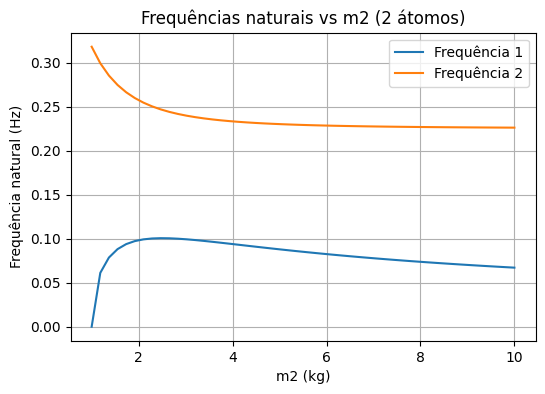

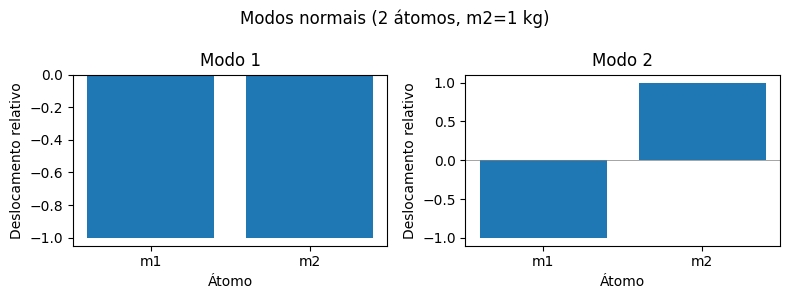

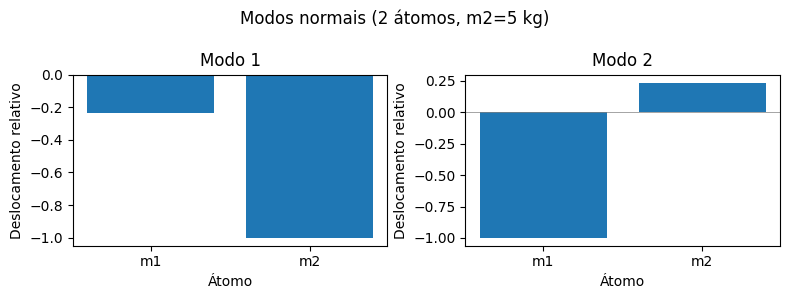

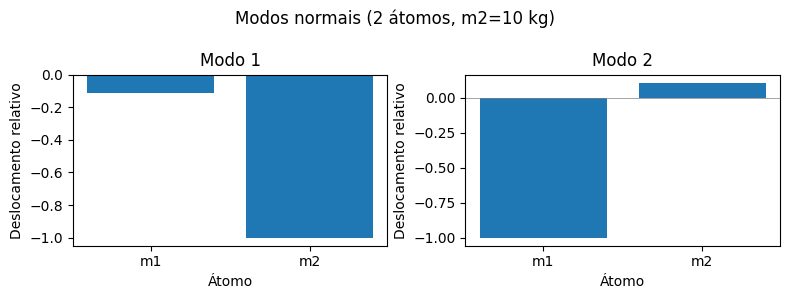

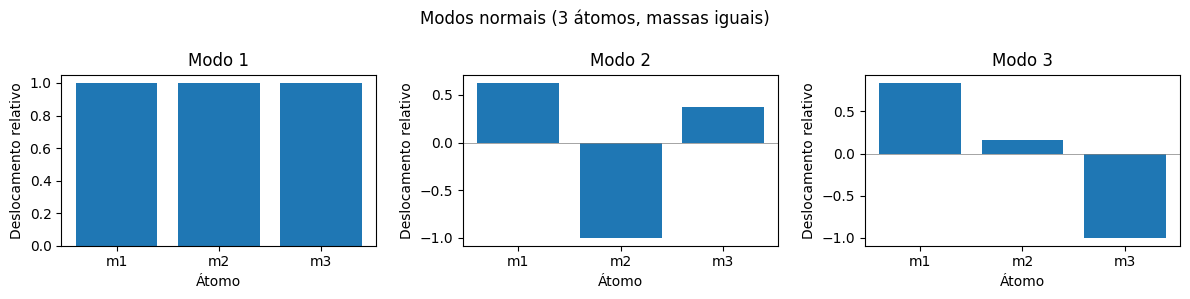

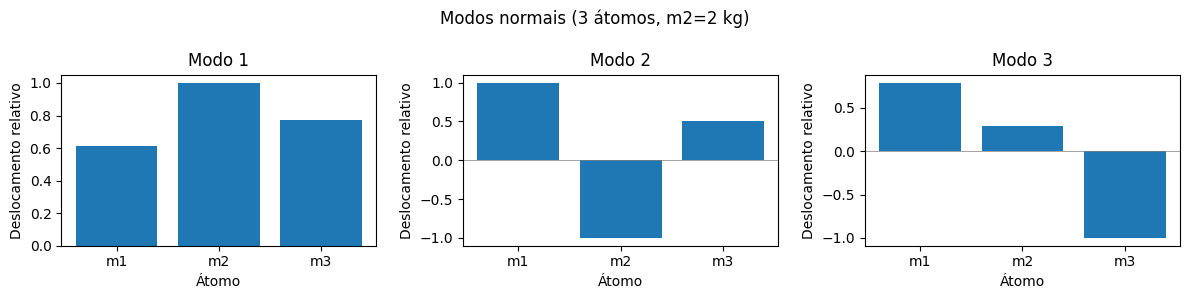

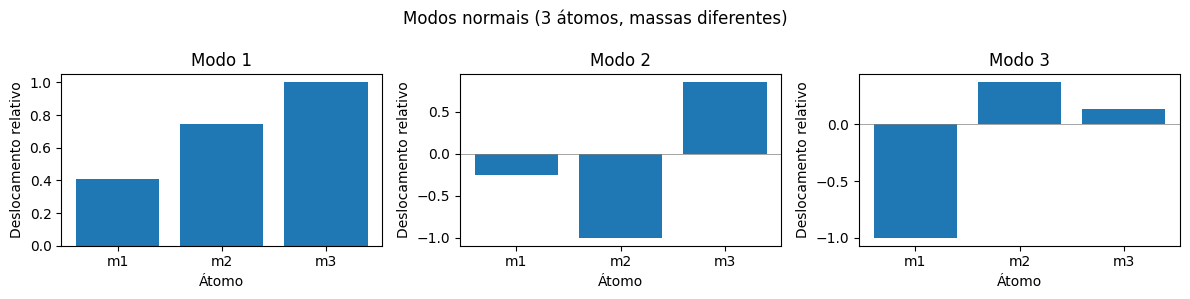

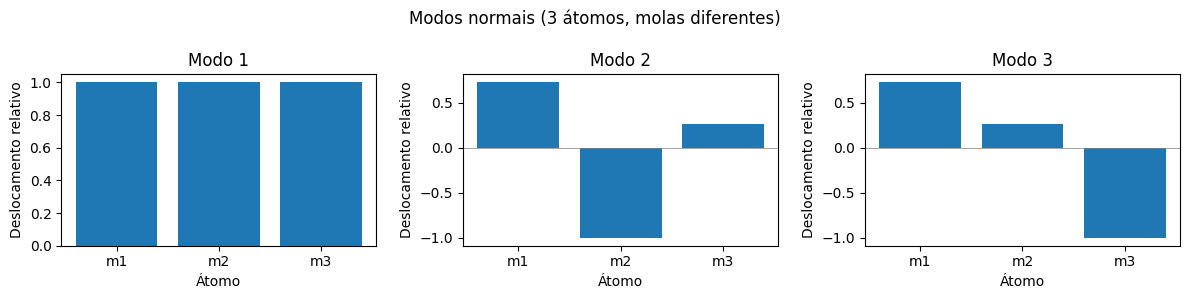

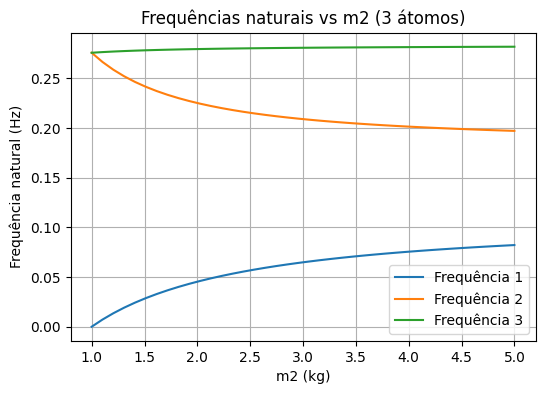

In [2]:
import numpy as np  # Biblioteca para operações numéricas eficientes
import matplotlib.pyplot as plt  # Biblioteca para geração de gráficos

# -----------------------------------------------------------
# Função genérica para resolver vibrações em cadeias periódicas
# -----------------------------------------------------------
def solve_vibration(masses, springs):
    """
    Calcula frequências naturais e modos normais para uma cadeia linear cíclica.
    masses: lista de massas [m1, m2, ...]
    springs: lista de constantes de mola [k1, k2, ...] (k_i entre m_i e m_{i+1}, cíclico)
    Retorna:
      frequências (Hz), modos normais (autovetores normalizados)
    """
    N = len(masses)  # Número de graus de liberdade (átomos)
    
    # Construir matriz de massa M (diagonal)
    M = np.diag(masses)
    
    # Inicializar matriz de rigidez K de tamanho NxN
    K = np.zeros((N, N))
    
    # Montar K usando condição periódica: k[i] conecta massa i e i+1, e k[-1] fecha o ciclo
    for i in range(N):
        # Soma das constantes ligadas ao átomo i (diagonal)
        K[i, i] += springs[i] + springs[i-1]
        # Termos fora da diagonal: acoplamento entre i e i-1 (cíclico)
        K[i, i-1] -= springs[i-1]
        K[i-1, i] -= springs[i-1]
    
    # Inverter matriz de massa
    Minv = np.linalg.inv(M)
    
    # Montar matriz A = M^{-1} * K
    A = Minv @ K
    
    # Resolver problema de autovalores: A v = λ v
    eigvals, eigvecs = np.linalg.eigh(A)
    
    # Converter autovalores λ em frequências naturais ω (rad/s)
    omegas_rad = np.sqrt(np.abs(eigvals))
    # Converter ω para Hz: f = ω/(2π)
    freqs = omegas_rad / (2 * np.pi)
    
    # Ordenar resultados por frequência crescente
    idx = np.argsort(freqs)
    freqs = freqs[idx]
    eigvecs = eigvecs[:, idx]
    
    # Normalizar cada modo para que o valor máximo absoluto seja 1
    for j in range(N):
        eigvecs[:, j] /= np.max(np.abs(eigvecs[:, j]))
    
    return freqs, eigvecs

# -----------------------------------------------------------
# Função para plotar modos normais como barras de deslocamento
# -----------------------------------------------------------
def plot_modes(modes, title, labels=None):
    N, num_modes = modes.shape
    # Criar figura com subplots lado a lado
    fig, axes = plt.subplots(1, num_modes, figsize=(4*num_modes, 3))
    
    # Garantir que axes seja iterável para o caso de um único modo
    if num_modes == 1:
        axes = [axes]
    
    # Para cada modo, desenhar barras de deslocamento
    for i, ax in enumerate(axes):
        ax.axhline(0, color='gray', lw=0.5)  # Linha zero para referência
        ax.bar(
            range(1, N+1),        # Índices dos átomos
            modes[:, i],           # Deslocamentos relativos
            tick_label=labels or list(range(1, N+1))
        )
        ax.set_title(f"Modo {i+1}")  # Título do subplot
        ax.set_xlabel("Átomo")        # Legenda do eixo X
        ax.set_ylabel("Deslocamento relativo")  # Legenda do eixo Y
    
    plt.suptitle(title)    # Título geral da figura
    plt.tight_layout()     # Ajusta espaçamento
    plt.show()

# -----------------------------------------------------------
# Exemplos de uso:
# 1) Cadeia de 2 átomos com m2 variando de 1 a 10
# -----------------------------------------------------------
m1 = 1.0  # Massa fixa do primeiro átomo
k = 1.0    # Constante da mola
m2_values = np.linspace(1, 10, 50)  # Valores de m2 a testar

# Calcular frequências para cada valor de m2
freqs_2atoms = []
for m2 in m2_values:
    f, _ = solve_vibration([m1, m2], [k, k])  # Duas molas iguais no ciclo
    freqs_2atoms.append(f)
freqs_2atoms = np.array(freqs_2atoms)

# Plotar evolução das duas frequências em função de m2
plt.figure(figsize=(6,4))
plt.plot(m2_values, freqs_2atoms[:,0], label='Frequência 1')
plt.plot(m2_values, freqs_2atoms[:,1], label='Frequência 2')
plt.xlabel('m2 (kg)')
plt.ylabel('Frequência natural (Hz)')
plt.title('Frequências naturais vs m2 (2 átomos)')
plt.legend()
plt.grid(True)
plt.show()

# Plotar modos normais para casos específicos de m2
for m2 in [1, 5, 10]:
    f, v = solve_vibration([m1, m2], [k, k])
    plot_modes(
        modes=v,
        title=f"Modos normais (2 átomos, m2={m2} kg)",
        labels=['m1','m2']
    )

# -----------------------------------------------------------
# 2) Cadeia de 3 átomos: massas iguais, uma distinta e todas diferentes
# -----------------------------------------------------------
# Massas iguais
masses_3_equal = [1, 1, 1]
springs_3 = [1, 1, 1]
freqs3, modes3 = solve_vibration(masses_3_equal, springs_3)
plot_modes(modes3, "Modos normais (3 átomos, massas iguais)", labels=['m1','m2','m3'])

# Uma massa distinta (m2 = 2 kg)
masses_3_one_diff = [1, 2, 1]
freqs3b, modes3b = solve_vibration(masses_3_one_diff, springs_3)
plot_modes(modes3b, "Modos normais (3 átomos, m2=2 kg)", labels=['m1','m2','m3'])

# Todas diferentes
masses_3_all_diff = [1, 2, 3]
freqs3c, modes3c = solve_vibration(masses_3_all_diff, springs_3)
plot_modes(modes3c, "Modos normais (3 átomos, massas diferentes)", labels=['m1','m2','m3'])

# -----------------------------------------------------------
# 3) Variação das constantes de mola na cadeia de 3 átomos
# -----------------------------------------------------------
springs_var = [1, 2, 3]
freqs3d, modes3d = solve_vibration([1,1,1], springs_var)
plot_modes(modes3d, "Modos normais (3 átomos, molas diferentes)", labels=['m1','m2','m3'])

# -----------------------------------------------------------
# 4) Gráfico de frequências vs m2 para 3 átomos
# -----------------------------------------------------------
m2_vals = np.linspace(1, 5, 40)
freqs_3atoms = []
for m2 in m2_vals:
    f, _ = solve_vibration([1, m2, 1], [1,1,1])
    freqs_3atoms.append(f)
freqs_3atoms = np.array(freqs_3atoms)

plt.figure(figsize=(6,4))
for i in range(3):
    plt.plot(m2_vals, freqs_3atoms[:,i], label=f'Frequência {i+1}')
plt.xlabel('m2 (kg)')
plt.ylabel('Frequência natural (Hz)')
plt.title('Frequências naturais vs m2 (3 átomos)')
plt.legend()
plt.grid(True)
plt.show()
